# Modelamiento de bases de datos
Objetivos
- Tipos de relaciones
  - 1 a 1
  - 1 a N
  - N a N
- Conocer los distintos tipos de modelos
  - Relacional
  - Lógico
  - Físico
- Visualización y creación del modelo físico

- Visualización de relaciones en modelo físico
- Creación de base de datos usando sql



# Ejemplo
Para todo este ejercicios trabajaremos con un problema de ejemplo a modelar.

Este es la creación de uun blog en el que un usuario puedes hacer entradas y esas entradas pueden ser comentadas por cualquier persona.

# Tipos de relaciones

Las relaciones de bases de datos son asociaciones entre tablas que se crean en base al problema que se esta modelando.

## 1 a 1
En una relación de uno a uno, un registro de una tabla se asocia a uno y solo un registro de otra tabla.

## 1 a N

En una relación de uno a muchos, un registro de una tabla se puede asociar a uno o varios registros de otra tabla.

## N a N

Una relación de muchos a muchos se produce cuando varios registros de una tabla se asocian a varios registros de otra tabla.

# Modelamiento

Definición:
Modelamiento significa pasar un proceso / problema / situación de la vida real a una forma algorítmica y con una estructura que el computador pueda procesar.

## Modelamiento base de datos

Determinar los entes que participan en el proceso y caracterizarlos para poder ser manipulados computacionalmente

Esto se trabaja en 5 niveles y 3 son los más importantes

- Vida Real
- **Nivel Conceptual: Modelo ER**
- **Nivel Lógico: Modelo Lógico**
- **Nivel Físico: Modelo Relacional y Físico**
- Hardware






# Modelo Conceptual
Debe ser claro , coherente , pleno , fiel  y sencillo.
- El número de elementos debe ser tan pequeño como sea posible
- Ha de separar claramente conceptos distintos
- Preservar simetrías naturales 
- La redundancia debe ser controlada

Además este:
- No esta sujeto a las limitaciones del Hardware, lo que facilita su permanencia en tiempo.
- Esta es la forma más simple de modelar un problema y debe satisfacer las necesidades de los clientes antes de pasarlo a un idioma más técnico

Esto tipo de modelación se puede representar usando el modelo entidad relación

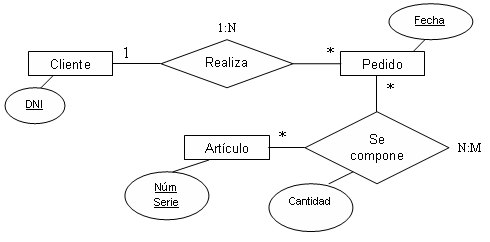

Veamos como son las relaciones en este modelo

# Modelo Lógico

Un modelo lógico de datos es un modelo que no es específico de una base de datos que describe aspectos relacionados con las necesidades de una organización para recopilar datos y las relaciones entre estos aspectos.

Caracteristicas:
- Toma en cuenta cosas como el dominio de los atributos
- Sigue siendo un modelo, pero ya se puede llevar a la interpretación física en forma casi directa
- El objetivo del modelo relacional es crear un esquema

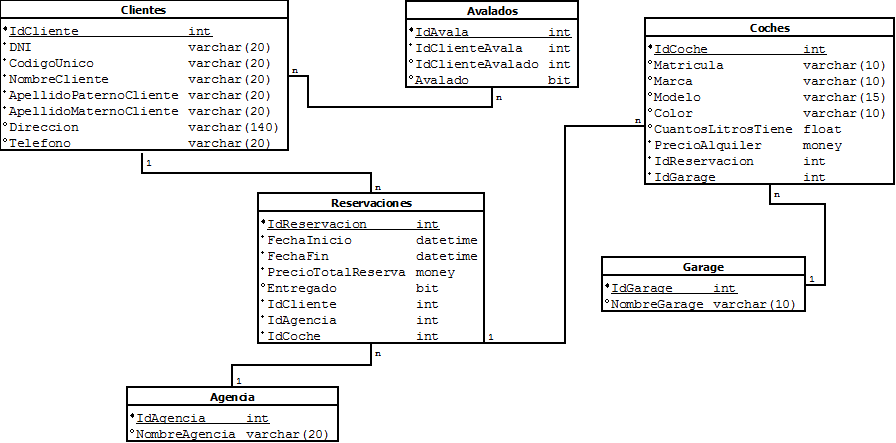

Veamos como son las relaciones en este modelo




# Modelo Físico

Describe cómo se va a implementar una base de datos sobre un DBMS específico

Es la creación de la base de datos usando sql en base a alguno de los modelos utilizado, lo normal es usar el lógico porque es el más cercano a la realidad.

En otras palabras son los comandos create que generan la base de datos, pero es importante saber como se modelan las relaciones.



```
CREATE DATABASE IF NOT EXISTS sistema;

CREATE TABLE IF NOT EXISTS datos 
( 
    id int(10) not null,
    nombre varchar (25),
    dirrecion varchar(25),
    telefono varchar(15),
    PRIMARY KEY (id) 
)
```



Veamos como son las relaciones en este modelo


Creemos una base de datos en Sqlite como ejemplo

In [31]:
%load_ext sql
%sql sqlite:///blog2.db


The sql extension is already loaded. To reload it, use:
  %reload_ext sql


'Connected: @blog2.db'

In [30]:
%reload_ext sql

In [32]:
%%sql

CREATE TABLE users  (
  user_id INTEGER PRIMARY KEY,
	first_name VARCHAR(255) NOT NULL,
	last_name VARCHAR(255) NOT NULL,
	email VARCHAR(255) NOT NULL UNIQUE,
	phone VARCHAR(255) NOT NULL UNIQUE
);

CREATE TABLE posts (
    post_id INTEGER PRIMARY KEY,
    title varchar(255) NOT NULL,
    content TEXT NOT NULL,
    user_id INTEGER,
    FOREIGN KEY (user_id) 
      REFERENCES users (user_id) 
         ON DELETE CASCADE 
         ON UPDATE NO ACTION
);

CREATE TABLE comments (
    comment_id INTEGER PRIMARY KEY,
    content varchar(255) NOT NULL,
    user_id INTEGER NOT NULL,
    post_id INTEGER NOT NULL,
    FOREIGN KEY (post_id) 
      REFERENCES posts (post_id) 
         ON DELETE CASCADE 
         ON UPDATE NO ACTION,
    FOREIGN KEY (user_id) 
      REFERENCES users (user_id) 
         ON DELETE CASCADE 
         ON UPDATE NO ACTION
);

   sqlite:///blog.db
 * sqlite:///blog2.db
Done.
Done.
Done.


[]

In [ ]:
%%sql
insert into users ('first_name','last_name','email','phone') values ('Pepito','Huurtado','ph@gmail.com','76693894')

In [ ]:
%%sql
select * from users

In [ ]:
%%sql
insert into posts('title','content','user_id') values ('title1','content1',1)

In [44]:
%%sql
select * from posts

   sqlite:///blog.db
 * sqlite:///blog2.db
Done.


post_id,title,content,user_id
1,title1,content1,1


In [46]:
%%sql

insert into comments('content','user_id','post_id') values ('comment1',1,1)

   sqlite:///blog.db
 * sqlite:///blog2.db
1 rows affected.


[]

In [47]:
%%sql
select * from comments

   sqlite:///blog.db
 * sqlite:///blog2.db
Done.


comment_id,content,user_id,post_id
1,comment1,1,1


In [49]:
%%sql

select * from posts,users where posts.user_id = users.user_id

   sqlite:///blog.db
 * sqlite:///blog2.db
Done.


post_id,title,content,user_id,user_id_1,first_name,last_name,email,phone
1,title1,content1,1,1,Pepito,Huurtado,ph@gmail.com,76693894
